In [10]:

# installe mlflow y boto3

# Se leen los datos de divorcio

In [6]:
datapath = '/Users/santireycha/Downloads/divorce/divorce.csv' # no la tenemos en produccion 
data = load_data(datapath)

# Se genera un mlflow con regresion logistica

In [3]:
mlflow.set_tracking_uri("http://10.189.228.176:5000")
mlflow.set_experiment(f"/team11/prediccion_divorsio")

with mlflow.start_run() as run:
    # Load the diabetes dataset.
    X = data.drop('Class', axis=1)
    y = data['Class']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Explorar datos
    explore_data(data)

    # Log data split information
    mlflow.log_param("train_data_size", len(X_train))
    mlflow.log_param("test_data_size", len(X_test))

    # 2. Create a Pipeline for Preprocessing and Model Training
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga'))
    ])

    # 3. Train the Model
    pipeline.fit(X_train, y_train)

    # 4. Evaluate the Model
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Log model performance metrics
    mlflow.log_metric("accuracy", accuracy)

    # Generate and print classification report
    report = classification_report(y_test, y_pred)
    print(report)
    mlflow.log_text(report, "classification_report.txt")  # Save report to artifacts

    # Generate and print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    mlflow.log_text(str(cm), "confusion_matrix.txt")  # Save matrix to artifacts

    # 5. Log Model with MLflow
    mlflow.sklearn.log_model(pipeline, "Divorce_Prediction_Model")

    # 6. Add any relevant tags or information
    mlflow.set_tag("developer", "Team 11")  # For example
    mlflow.set_tag("model_type", "LogisticRegression")

print("MLflow experiment completed. Check mlruns folder for results.")

     Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr46  \
0       2     2     4     1     0     0     0     0     0      0  ...      2   
1       4     4     4     4     4     0     0     4     4      4  ...      2   
2       2     2     2     2     1     3     2     1     1      2  ...      3   
3       3     2     3     2     3     3     3     3     3      3  ...      2   
4       2     2     1     1     1     1     0     0     0      0  ...      2   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...    ...   
165     0     0     0     0     0     0     0     0     0      0  ...      1   
166     0     0     0     0     0     0     0     0     0      0  ...      4   
167     1     1     0     0     0     0     0     0     0      1  ...      3   
168     0     0     0     0     0     0     0     0     0      0  ...      3   
169     0     0     0     0     0     0     0     1     0      0  ...      3   

     Atr47  Atr48  Atr49  Atr50  Atr51 

2024/10/13 21:48:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/13 21:48:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run polite-calf-866 at: http://localhost:5000/#/experiments/126551647513598786/runs/5fb71be8ec4b4226bcc5c3f0556d31ce.
2024/10/13 21:48:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/126551647513598786.


MLflow experiment completed. Check mlruns folder for results.


# Pipeline de todos los modelos

 - 1. Regresion logistica
   2. Random Forest
   3. PCA + Regresion logistica

In [7]:
# Define una función para el entrenamiento y la evaluación
def run_experiment(model_name, model_func, X, y):
    with mlflow.start_run():
        mlflow.log_param("model_name", model_name)

        # Entrenamiento del modelo
        model, X_test, y_test = model_func(X, y)
        mlflow.sklearn.log_model(model, "model")  # Registra el modelo en MLflow

        # Evaluación del modelo
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)


        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        print(f"Modelo: {model_name}")
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-score: {f1}")


# Preprocesamiento, entrenamiento y evaluación con MLflow

# Regresión Logística
run_experiment("Logistic Regression", train_logistic_regression, X, y)

# Random Forest
run_experiment("Random Forest", train_random_forest, X, y)

# PCA + Regresión Logística
run_experiment("PCA + Logistic Regression", train_with_pca, X, y)

2024/10/13 21:51:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/13 21:51:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run upbeat-elk-773 at: http://localhost:5000/#/experiments/126551647513598786/runs/96dd2506f07f43aa8b1a9328459900a8.
2024/10/13 21:51:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/126551647513598786.


Modelo: Logistic Regression
Accuracy: 0.9705882352941176
Precision: 1.0
Recall: 0.95
F1-score: 0.9743589743589743


2024/10/13 21:51:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/13 21:51:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run nosy-frog-972 at: http://localhost:5000/#/experiments/126551647513598786/runs/d5fefd8d37e545b994539743e8d575b5.
2024/10/13 21:51:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/126551647513598786.


Modelo: Random Forest
Accuracy: 0.9705882352941176
Precision: 1.0
Recall: 0.95
F1-score: 0.9743589743589743


2024/10/13 21:51:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/13 21:51:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run dazzling-swan-6 at: http://localhost:5000/#/experiments/126551647513598786/runs/fa30ec1f63ac44ecab67a2d98d956005.
2024/10/13 21:51:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/126551647513598786.


Modelo: PCA + Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [1]:
# Como sería un grid search con mlflow 

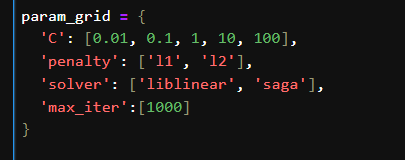

In [13]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Definir listas de hiperparámetros
C_LIST = [0.01, 0.1, 1, 10, 100]
PENALTY_LIST = ['l1', 'l2']
SOLVER_LIST = ['liblinear', 'saga']
MAX_ITER_LIST = [1000]

# Configurar MLflow
mlflow.set_tracking_uri("http://localhost:5000")  # Cambia el URI si es necesario
mlflow.set_experiment("/team11/prediccion_divorsio")

# Contador para el número de iteración
run_counter = 1

# Iniciar Grid Search
for c in C_LIST:
    for penalty in PENALTY_LIST:
        for solver in SOLVER_LIST:
            if penalty == 'l1' and solver == 'saga':
                # Penalización l1 no es compatible con el solver 'saga'
                continue

            for max_iter in MAX_ITER_LIST:
                # Crear nombre único para la run
                run_name = f"LOG_REG_Run_{run_counter}_C{c}_Penalty{penalty}_Solver{solver}_Iter{max_iter}"

                with mlflow.start_run(run_name=run_name) as run:
                    # Registrar parámetros
                    mlflow.log_param("C", c)
                    mlflow.log_param("penalty", penalty)
                    mlflow.log_param("solver", solver)
                    mlflow.log_param("max_iter", max_iter)

                    # Dividir los datos
                    X = data.drop('Class', axis=1)
                    y = data['Class']
                    X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2, random_state=42
                    )

                    # Crear pipeline
                    pipeline = Pipeline([
                        ("scaler", StandardScaler()),
                        ("model", LogisticRegression(
                            C=c, 
                            penalty=penalty, 
                            solver=solver, 
                            max_iter=max_iter,
                            random_state=42
                        ))
                    ])

                    # Entrenar el modelo
                    pipeline.fit(X_train, y_train)

                    # Predecir y evaluar
                    y_pred = pipeline.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred)

                    # Registrar métricas y resultados
                    mlflow.log_metric("accuracy", accuracy)

                    report = classification_report(y_test, y_pred)
                    mlflow.log_text(report, "classification_report.txt")

                    cm = confusion_matrix(y_test, y_pred)
                    mlflow.log_text(str(cm), "confusion_matrix.txt")

                    # Guardar el modelo
                    mlflow.sklearn.log_model(pipeline, "Divorce_Prediction_Model")

                    # Agregar tags relevantes
                    mlflow.set_tag("developer", "Team 11")
                    mlflow.set_tag("model_type", "LogisticRegression")

                print(f"{run_name} completed.")
                
                # Incrementar el contador de runs
                run_counter += 1

print("Grid Search completed. Check MLflow dashboard for results.")


     Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr46  \
0       2     2     4     1     0     0     0     0     0      0  ...      2   
1       4     4     4     4     4     0     0     4     4      4  ...      2   
2       2     2     2     2     1     3     2     1     1      2  ...      3   
3       3     2     3     2     3     3     3     3     3      3  ...      2   
4       2     2     1     1     1     1     0     0     0      0  ...      2   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...    ...   
165     0     0     0     0     0     0     0     0     0      0  ...      1   
166     0     0     0     0     0     0     0     0     0      0  ...      4   
167     1     1     0     0     0     0     0     0     0      1  ...      3   
168     0     0     0     0     0     0     0     0     0      0  ...      3   
169     0     0     0     0     0     0     0     1     0      0  ...      3   

     Atr47  Atr48  Atr49  Atr50  Atr51 

2024/10/20 19:55:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run chill-bear-670 at: http://10.189.228.176:5000/#/experiments/3/runs/3e2054401eac41da9ee9fc96e8dbdaaa.
2024/10/20 19:55:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://10.189.228.176:5000/#/experiments/3.


NoCredentialsError: Unable to locate credentials